# Ames Housing Sale Price Analysis

Marie-Gisele Boyogueno

## Executive Summary

   This project will help us understand different factors that influence home sale in the Ames Housing.
    We will evaluate differents variables and use descriptive statistics and data visualization to better analyse our dataset.

## The Data

The dataset used is coming from Ames Housing, whic contains information about the home sales in Ames, Iowa between 2006 and 2010.

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [65]:
# the column names, number of rows, etc.
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [67]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Distribution of `SalePrice`

[Text(0.5, 1.0, 'Distribution of Sale Price'),
 Text(0.5, 0, 'Sale Price'),
 Text(0, 0.5, 'Number of Houses')]

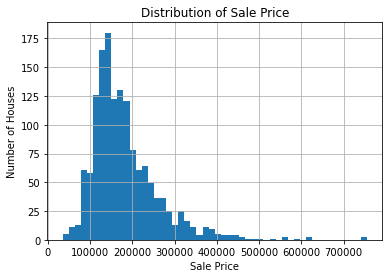

In [68]:
#  write code to select SalePrice from the data and
df['SalePrice']
# create a plot to display its distribution
df['SalePrice'].hist(bins=50).set(
    title='Distribution of Sale Price',
    xlabel='Sale Price',
    ylabel='Number of Houses'
    
   )


In [69]:
df['SalePrice'].mean()

180921.19589041095

In [70]:
df['SalePrice'].median()

163000.0

In [71]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [72]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

    As the Sale Price increases, there are less buyers as shown on the graph. 
    The range of Ames Housing sale price varies between $34900 and $755000,with the median home price of $163000.
    The median give us a good estimate of the average sale price in that neighborhood.
    Visually that is were we find the majority of buyers. 
    
    

## Differences between Subsets

 Explanation  of the subsets you are creating :
 Here we are going to create subsets based on the description below:
        
 - below_average_condition OverallCond < 5
 - average_condition, OverallCond = 5
 - above_average_condition , OverallCond  > 5 

Then we are going to plot for a better visualization of the distribution of the Sale Price.    

In [73]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [74]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [75]:
sale = df[['SalePrice', 'OverallCond', 'YearBuilt']]
sale2 = df[df['OverallCond']>5]
#sale3 = df[ 'YearBuilt']

sale2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000


In [76]:
#  write code to separate the data into two or more subsets

# Select subsets
above_average_condition = df[df["OverallCond"] > 5 ]
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]

In [77]:
above_average_condition.describe()['SalePrice'] 


count       551.000000
mean     158216.281307
std       59968.759480
min       37900.000000
25%      124900.000000
50%      144500.000000
75%      176250.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [78]:
below_average_condition.describe()['SalePrice']
 

count        88.000000
mean     115729.068182
std       50911.059417
min       35311.000000
25%       83500.000000
50%      108000.000000
75%      138750.000000
max      394432.000000
Name: SalePrice, dtype: float64

In [79]:
average_condition.describe()['SalePrice']

count       821.000000
mean     203146.914738
std       85117.319416
min       34900.000000
25%      144000.000000
50%      185000.000000
75%      239686.000000
max      745000.000000
Name: SalePrice, dtype: float64

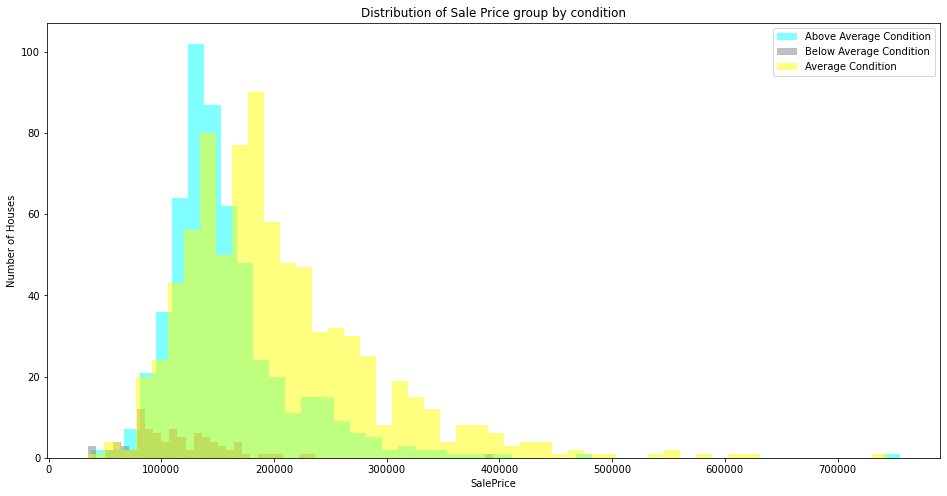

In [80]:
#  write code to create one or more plots that shows the 
# difference in SalePrice between subsets

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
above_average_condition = df[df["OverallCond"] > 5 ]
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]

# Plot data with different colors
ax.hist(
    above_average_condition["SalePrice"],
    #y=above_average_condition['BldgType'],
    alpha=0.5,
    bins=50,
    color="cyan",
    label="Above Average Condition"
)
ax.hist(
    below_average_condition["SalePrice"],
    #y=below_average_condition['BldgType'],
    alpha=0.5,
    bins=50,
    color="gray",
    label="Below Average Condition"
)
ax.hist(
    average_condition["SalePrice"],
    #y=average_condition['BldgType'],
    alpha=0.5,
    bins=50,
    color="yellow",
    label="Average Condition"
)

# Customize appearance
ax.set_xlabel("SalePrice")
ax.set_ylabel("Number of Houses")
ax.set_title("Distribution of Sale Price group by condition")
ax.legend();



  
    Based on the subsets plots, we see that sales are driven by the overall condition of gthe houses.
    Most of the sales happenned in our average_condition subset whith the highest mean values of $203146.91;
and the lowest mean value of $115729.06 in the below_average_condition subset. 

## Correlation between 'YearBuilt' and `SalePrice`


In [81]:
# write code to calculate the correlation between your
# chosen column and SalePrice
df.corr()['SalePrice']['YearBuilt']

0.5228973328794967

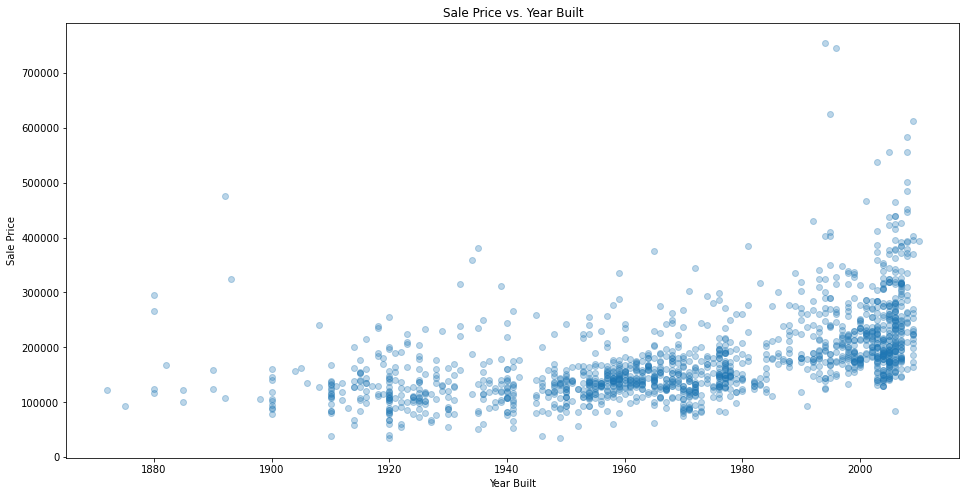

In [82]:
#  write code to create a scatter plot with your chosen
# 'YearBuilt'on the x-axes and SalePrice on the y-axis

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=df["YearBuilt"],
    y=df["SalePrice"],
    alpha=0.3
)

ax.set_xlabel("Year Built")
ax.set_ylabel("Sale Price")
ax.set_title("Sale Price vs. Year Built");

    
    This plot shows that the house market increases over the years and the cost of ownership also increases over the years.
    We see that there is a strong correlation between the year built and the Sale Price.
    Therefore, it costs more to buy a house nowadays than before.

## Engineered Feature: 'RemodelHome'


In [83]:
#  write code that creates a new column based on
# values in two or more other columns
df['RemodelHome'] = df.apply(lambda row: row.YearRemodAdd + row.OverallQual, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodelHome
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2010
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1982
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2009
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1977
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008


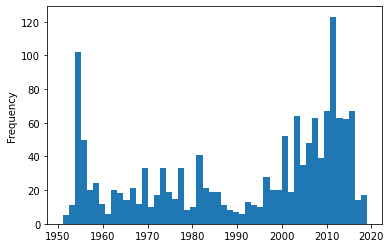

In [84]:
#  write code to create some kind of plot that uses
# your new engineered feature
df['RemodelHome'].plot.hist(bins=50);

  
    The number of home remodeled was higher in 2010 at a frequency of 120 and drastically fall below 20. 
    This correspond to the pandemic time and clearly explain why.